# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros


## Visualização de Dados

Python possui diversas bibliotecas para criar visualizações de dados. Nesta aula, vamos utilizar a biblioteca Seaborn.

In [1]:
import seaborn as sns
sns.set_palette('Set2')

### Gráfico de Barra

O gráfico de barra é uma boa escolha quando você deseja mostrar a variação de quantidades entre um conjunto discreto de itens. Ele é simples e permite comparações precisas.

Vamos criar um gráfico de barras mostrando o número de Oscars que alguns filmes ganharam. Primeiro definimos um dicionário com os dados. Nele, temos a chave `"movies"` com uma lista de filmes como valor associado, e temos a chave `"num_oscars"` com uma lista de Oscars que cada filme ganhou.

In [2]:
my_data = {"movies": ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"],
           "num_oscars": [5, 11, 3, 8, 10] }

Para criar o gráfico de barra usamos a função `barplot` passando os parâmetros:

- data: dados usados no gráfico
- x: nome da chave com os dados do eixo X
- y: nome da chave com os dados do eixo Y

<AxesSubplot:>

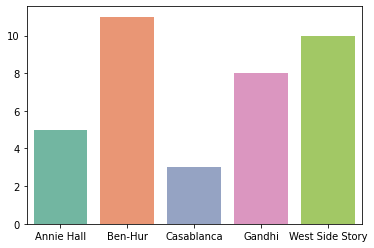

In [3]:
sns.barplot(data=my_data, x="movies", y="num_oscars")

Para rotular os eixos, basta usar a função `set` como mostrado abaixo:

[Text(0.5, 0, 'Filmes'), Text(0, 0.5, 'Número de Oscars')]

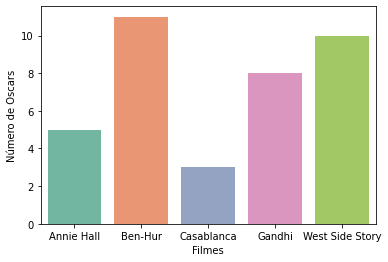

In [4]:
ax = sns.barplot(data=my_data, x="movies", y="num_oscars")
ax.set(xlabel='Filmes', ylabel='Número de Oscars')

### Gráfico de Linha

O gráfico de linha é uma boa escolha para mostrar tendências. Nele, temos vários pontos que são interligados definindo uma função contínua. Isto é útil para termos uma ideia melhor dos valores em Y para todos os valores no eixo X.

O Seaborn possui alguns datasets que podem ser importados diretamente da biblioteca. No exemplo abaixo, vamos usar um dataset sobre viagens de avião.

In [5]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Para criar um gráfico que mostra a evolução do número de passageiros nos vôos nos meses de janeiro durante os anos disponíveis no dataset, primeiro filtramos o dataframe para ter apenas os meses de janeiro:

In [6]:
jan_flights = flights[flights["month"] == "Jan"]
jan_flights

,year,month,passengers
0,1949,Jan,112
12,1950,Jan,115
24,1951,Jan,145
36,1952,Jan,171
48,1953,Jan,196
60,1954,Jan,204
72,1955,Jan,242
84,1956,Jan,284
96,1957,Jan,315
108,1958,Jan,340


A função `lineplot` é responsável pela criação do gráfico de linha. Os parâmetros passados são semelhantes aos do gráfico de barra:

<AxesSubplot:xlabel='year', ylabel='passengers'>

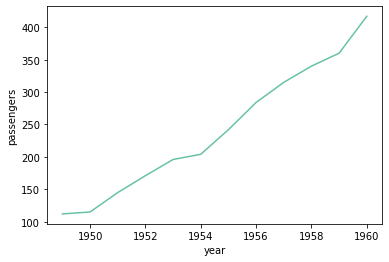

In [7]:
sns.lineplot(data=jan_flights, x="year", y="passengers")

Para maior clareza, é importante exibir onde estão os pontos do dataset, não apenas a linha. Assim, quem estiver analisando o gráfico sabe quais valores foram coletados e quais são resultado da conexão entre os pontos. Para isso, usamos o parâmetro `marker` na função `lineplot`:

<AxesSubplot:xlabel='year', ylabel='passengers'>

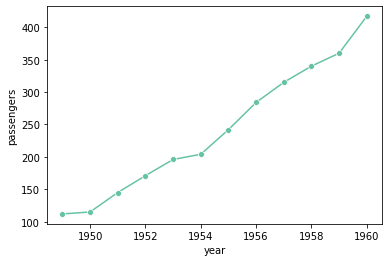

In [8]:
sns.lineplot(data=jan_flights, x="year", y="passengers", marker="o")

Usando o parâmetro `hue` podemos definir uma coluna que define diferentes grupos analisados. Usando a coluna `"month"` serão geradas uma linha para cada mês.

<AxesSubplot:xlabel='year', ylabel='passengers'>

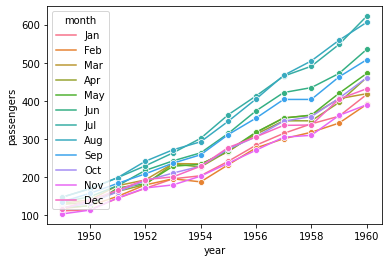

In [9]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", marker="o")

### Gráfico de Dispersão

O gráfico de dispersão é uma boa escolha para mostrar a relação entre duas variáveis. Ele apresenta todos os valores (x,y) dos pontos de um dataset.

Vamos utilizar um dataset sobre gorjetas em restaurantes.

In [10]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Com a função `scatterplot` criamos o gráfico de dispersão. Abaixo temos um gráfico que mostra a relação entre a variável `"total_bill"` (total da conta) e `"tip"` (gorjeta):

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

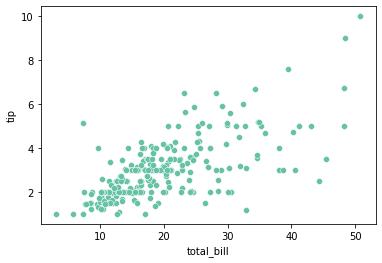

In [11]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

É possível criar gráficos de dispersão em três dimensões, mas costuma ser difícil analisar um gráfico desse tipo. Para representar uma terceira variável podemos utilizar outras estratégias. A primeira é usar cores diferentes nos pontos para a terceira variável. Na função `scatterplot`, passamos esse valor no parâmetro `hue`.

No gráfico abaixo, os pontos na cor verde representam as gorjetas dadas no horário do almoço e na cor laranja as gorjetas no horário do jantar.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

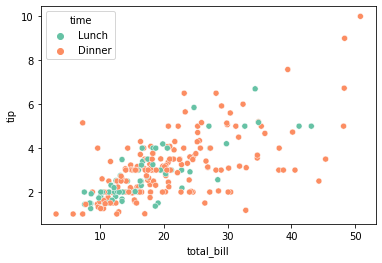

In [12]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

A segunda estratégia é variar o tamanho do ponto de acordo com uma terceira variável. Para isso, usamos o parâmetro `size`. No gráfico abaixo, o tamanho do ponto varia de acordo com a coluna que também se chama "size" (não confundir o nome do parâmetro com o nome da coluna no dataframe).

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

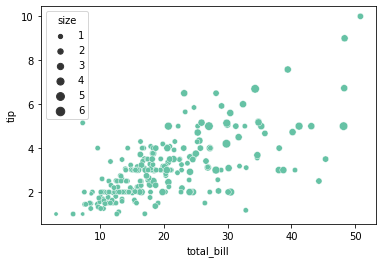

In [13]:
sns.scatterplot(data=tips, x="total_bill", y="tip", size="size")

O parâmetro `hue` é adequado para valores discretos e o `size` para valores contínuos.

Quando temos muitos pontos próximos, a visualização fica prejudicada. Uma dica para melhorar o gráfico nesse caso é tornar os pontos transparentes. Para isso, usamos o parâmetro `alpha`:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

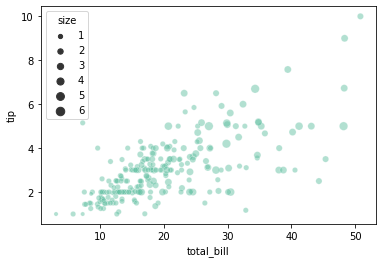

In [14]:
sns.scatterplot(data=tips, x="total_bill", y="tip", size="size", alpha=0.5)

### Histrograma

O Histograma é um gráfico que mostra a frequência de uma distribuição. Com ele, podemos responder, por exemplo, a pergunta: como os valores das gorjetas estão distribuídos?

No histograma os valores são agrupados em intervalos chamados "bins". No gráfico abaixo, vamos contar a frequência das gorjetas de acordo com o seu valor. Entretanto, como temos muitas variações de valores, agrupar em intervalos nos ajuda a simplificar e interpretar o gráfico.

Usando a função `displot` criamos um histograma. Como primeiro parâmetro temos os dados, o parâmetro `x` define a coluna usada e o `binwidth` o tamanho do intervalo.

Com `binwidth=2` vamos agrupar os valores em intervalos de tamanho 2. Assim, temos os intervalos: \[1,3\);\[3,5\);\[5,7\);\[7,9\);\[9,11\). 

Olhando para o gráfico, vemos que pouco mais de 120 gorjetas tinham o valores entre \[1,3\), para o intervalo \[3,5\) temos um pouco mais de 90 gorjetas, etc.



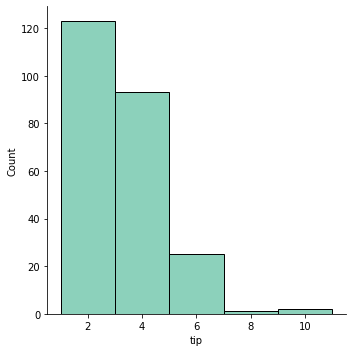

In [15]:
sns.displot(tips, x="tip", binwidth=2)

Diminuindo o tamanho do intervalo, podemos ter uma visualização mais precisa dos dados:

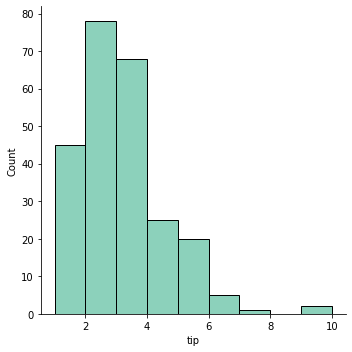

In [25]:
sns.displot(tips, x="tip", binwidth=1)

Na função `displot` podemos definir a quantidade de bins ao invés do tamanho do intervalo:

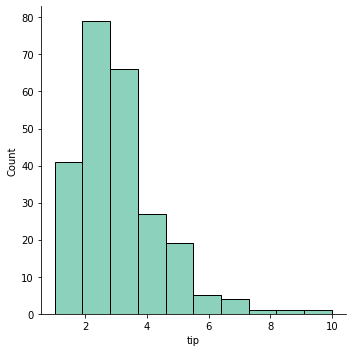

In [17]:
sns.displot(tips, x="tip", bins=10)

### Gráfico de Pizza

O gráfico de pizza precisa ser utilizado com cuidado, pois pode ser difícil comparar um setor da pizza com outro em relação a sua área, além do gráfico costumar tomar muito espaço para representar pouca informação. O melhor caso de uso do gráfico de pizza é para mostrar porcentagens de um todo.

Vamos fazer um gráfico de pizza para visualizar o valor total das gorjetas por dia. Para isso, inicialmente precisamos somar os valores para cada um dos dias disponíveis no dataset:

In [18]:
tips_per_day = tips.groupby("day").sum()
tips_per_day

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


O Seaborn não possui uma função para criar um gráfico de pizza. Entretanto, o Pandas possui funções para criar vários tipos de gráficos (linha, barra, dispersão, pizza, etc.). Você pode usar a opção que mais se adequar às suas necessidades.

Para criar um gráfico de pizza no Pandas, usa-se a função `pie`:

<AxesSubplot:ylabel='tip'>

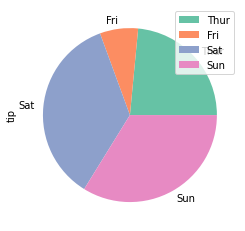

In [19]:
tips_per_day.plot.pie(y="tip")

Notem que é díficil saber se Sun (Domingo) é maior que Sat (Sábado).

Um gráfico de barra pode substituir um gráfico de pizza tornando possível uma comparação mais precisa entre os valores.

No exemplo abaixo, o Pandas também é usado para criar o gráfico de barra através da função `bar`:

<AxesSubplot:xlabel='day'>

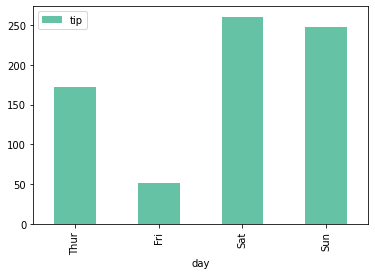

In [20]:
tips_per_day.plot.bar(y="tip")

### Matriz de Correlação

Para calcular a matriz de correlação a partir de um DataFrame, temos:

In [21]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Podemos usar o Seaborn para criar uma representação gráfica da matriz:

<AxesSubplot:>

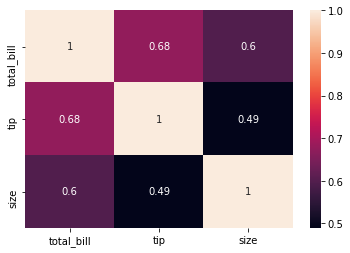

In [22]:
sns.heatmap(tips.corr(), annot=True)